<a href="https://colab.research.google.com/github/lyahmdh/Semester-2/blob/master/Tugas_Kelas_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np

# pembuatan data
data = {
    'NIM' : [3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010],
    'X' : [86, 70, 90, 76, 79, np.nan, 76, 90, 72, 86],
    'Y': [90, 73, 73, 78, 86, 84, 74, 20, 80, 72],
}

df = pd.DataFrame(data)
print(df)

    NIM     X   Y
0  3001  86.0  90
1  3002  70.0  73
2  3003  90.0  73
3  3004  76.0  78
4  3005  79.0  86
5  3006   NaN  84
6  3007  76.0  74
7  3008  90.0  20
8  3009  72.0  80
9  3010  86.0  72


In [25]:
# Soal 1 Mengisi nilai Null dengan mean
mean_x = round(df['X'].mean(), 2)
df['X'].fillna(mean_x, inplace=True)

print(df)

    NIM      X   Y
0  3001  86.00  90
1  3002  70.00  73
2  3003  90.00  73
3  3004  76.00  78
4  3005  79.00  86
5  3006  80.56  84
6  3007  76.00  74
7  3008  90.00  20
8  3009  72.00  80
9  3010  86.00  72


/tmp/ipython-input-25-42869923.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['X'].fillna(mean_x, inplace=True)


In [26]:
# Soal 2 membuat persamaan regresi linear nya
from sklearn.linear_model import LinearRegression

x = df[['X']]     # Nilai Probstat
y = df['Y']       # Nilai Matdis

# Buat model regresi linear
model = LinearRegression()
model.fit(x, y)

# Ambil koefisien dan intercept
a = model.coef_[0]       # kemiringan (slope)
b = model.intercept_     # intercept

# Cetak persamaan regresi
print(f"Persamaan regresi: y = {a:.6f}x + {b:.6f}")

Persamaan regresi: y = -1.117150x + 162.993105


In [27]:
# Soal 3 memperhalus outlier dengan persamaan regresi yang sudah ada

# Prediksi nilai Y
df['Prediksi_Y'] = model.predict(X)

# Ganti nilai Y == 20 dengan nilai prediksi
df['Y_Diperhalus'] = df.apply(
    lambda row: row['Prediksi_Y'] if row['Y'] == 20 else row['Y'], axis=1
)

# Lihat hasil
print(df[['NIM', 'X', 'Y', 'Prediksi_Y', 'Y_Diperhalus']])

    NIM      X   Y  Prediksi_Y  Y_Diperhalus
0  3001  86.00  90   66.918237     90.000000
1  3002  70.00  73   84.792631     73.000000
2  3003  90.00  73   62.449639     73.000000
3  3004  76.00  78   78.089734     78.000000
4  3005  79.00  86   74.738285     86.000000
5  3006  80.56  84   73.000497     84.000000
6  3007  76.00  74   78.089734     74.000000
7  3008  90.00  20   62.449639     62.449639
8  3009  72.00  80   82.558332     80.000000
9  3010  86.00  72   66.918237     72.000000


In [28]:
# pembuatan data 2
data2 = {
    'NIM' : [4001, 4002, 4003, 4004, 4005, 4006, 4007, 4008, 4009, 4010, 4011, 4012, 4013, 4014, 4015],
    'Nilai_Kalkulus' : [86, 85, 81, 81, 81, 90, 89, 86, -20, 84, 85, 80, 84, 86, 89],
}

df2 = pd.DataFrame(data2)
print(df2)

     NIM  Nilai_Kalkulus
0   4001              86
1   4002              85
2   4003              81
3   4004              81
4   4005              81
5   4006              90
6   4007              89
7   4008              86
8   4009             -20
9   4010              84
10  4011              85
11  4012              80
12  4013              84
13  4014              86
14  4015              89


In [30]:
# Soal 4 menentukan nilai Q1, Q2, Q3

Q1 = df2['Nilai_Kalkulus'].quantile(0.25)
Q2 = df2['Nilai_Kalkulus'].quantile(0.50)
Q3 = df2['Nilai_Kalkulus'].quantile(0.75)


# Menampilkan hasil
print(f"Q1 = {Q1}")
print(f"Q2 = {Q2}")
print(f"Q3 = {Q3}")

Q1 = 81.0
Q2 = 85.0
Q3 = 86.0


In [31]:
# Soal 5 menentukan ambang batas minimum dan maksimum

# Hitung IQR
IQR = Q3 - Q1

# Hitung batas bawah dan batas atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Menampilkan hasil
print(f"IQR: {IQR}")
print(f"Batas minimum (outlier bawah): {batas_bawah}")
print(f"Batas maksimum (outlier atas): {batas_atas}")

IQR: 5.0
Batas minimum (outlier bawah): 73.5
Batas maksimum (outlier atas): 93.5


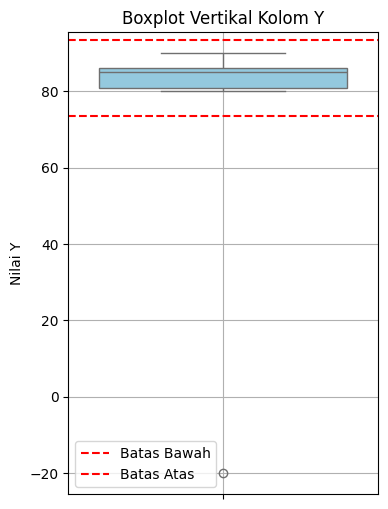

In [32]:
# Soal 6 membuat boxplot
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot
plt.figure(figsize=(4, 6))
sns.boxplot(y=df2['Nilai_Kalkulus'], color='skyblue')

# Garis batas bawah dan atas
plt.axhline(batas_bawah, color='red', linestyle='--', label='Batas Bawah')
plt.axhline(batas_atas, color='red', linestyle='--', label='Batas Atas')

plt.title('Boxplot Vertikal Kolom Y')
plt.ylabel('Nilai Y')
plt.legend()
plt.grid(True)
plt.show()